# Mini_project  Module 3  Hélène+Orphée (v. Hélène)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn

### Import des fichiers de données

In [2]:
carac = pd.read_csv("./data/carac-2019.csv",sep=';')
lieux = pd.read_csv("./data/lieux-2019.csv",sep=';')
veh = pd.read_csv("./data/vehicules-2019.csv",sep=';')
vict = pd.read_csv("./data/usagers-2019.csv",sep=';')

In [3]:
print(f'Forme de carac = {carac.shape}')
print(f'Forme de lieux = {lieux.shape}')
print(f'Forme de veh = {veh.shape}')
print(f'Forme de vict = {vict.shape}')

Forme de carac = (58840, 15)
Forme de lieux = (58840, 18)
Forme de veh = (100710, 11)
Forme de vict = (132977, 15)


In [4]:
print(set(carac.columns).intersection(set(lieux.columns)))
print(set(carac.columns).intersection(set(veh.columns)))
print(set(carac.columns).intersection(set(vict.columns)))
print(set(lieux.columns).intersection(set(veh.columns)))
print(set(lieux.columns).intersection(set(vict.columns)))
print(set(veh.columns).intersection(set(carac.columns)))
print(set(veh.columns).intersection(set(vict.columns)))

{'Num_Acc'}
{'Num_Acc'}
{'Num_Acc'}
{'Num_Acc'}
{'Num_Acc'}
{'Num_Acc'}
{'Num_Acc', 'num_veh', 'id_vehicule'}


**Observations**

Les 4 fichiers ont en commun la colonne 'NumAcc' (numéro d'accident).

Les fichiers 'veh' et 'vict' ont en commun 2 autres colonnes : 'num_veh' (identifiant de véhicule) et 'id_vehicule' (identifiant unique du véhicule). 

In [5]:
print("'carac' file:")
print(f"Number of NumAcc unique values = {carac.Num_Acc.nunique()}")
print(f'Max count by NumAcc unique value = {max(list(carac.Num_Acc.value_counts().values))}')
print(f'Number of rows = {len(carac)}')
print()
print("'lieux' file:")
print(f"Number of NumAcc unique values = {lieux.Num_Acc.nunique()}")
print(f'Max count by NumAcc unique value = {max(list(lieux.Num_Acc.value_counts().values))}')
print(f'Number of rows = {len(lieux)}')
print()
print("'veh' file:")
print(f"Number of NumAcc unique values = {veh.Num_Acc.nunique()}")
print(f'Max count by NumAcc unique value = {max(list(veh.Num_Acc.value_counts().values))}')
print(f'Number of rows = {len(veh)}')
print()
print("'vict' file:")
print(f"Number of NumAcc unique values = {vict.Num_Acc.nunique()}")
print(f'Max count by NumAcc unique value = {max(list(vict.Num_Acc.value_counts().values))}')
print(f'Number of rows = {len(vict)}')
print()

'carac' file:
Number of NumAcc unique values = 58840
Max count by NumAcc unique value = 1
Number of rows = 58840

'lieux' file:
Number of NumAcc unique values = 58840
Max count by NumAcc unique value = 1
Number of rows = 58840

'veh' file:
Number of NumAcc unique values = 58840
Max count by NumAcc unique value = 12
Number of rows = 100710

'vict' file:
Number of NumAcc unique values = 58840
Max count by NumAcc unique value = 33
Number of rows = 132977



**Observations**

A ce stade on peut supposer que : 
- chaque fichier recense les mêmes 58140 accidents distincts, identifiés par un identifiant unique. 
- ces 58140 accidents sont survenus chacun dans un lieu distinct (d'où 58140 lieux distincts), ont impliqué un nombre de véhicules plus ou moins grand (de 1 à 12) et occasionné un nombre de victimes plus ou moins grand (de 1 à 33).
Pour confirmer ces chiffres, nous devrons au préalable supprimer les éventuelles lignes en double dans chaque fichier.

### Fusion des fichiers

Notre étude porte sur la gravité des accidents pour les victimes, nous souhaitons donc disposer d'un fichier unique qui comptera 1 ligne par victime distincte.
Nous fusionnons donc le fichier 'vict' avec les 3 autres en excluant les lignes supplémentaires éventuelles de ces autres fichiers.

In [6]:
victime = vict.merge(veh,on=['Num_Acc','num_veh','id_vehicule'], how='left').merge(carac,on = 'Num_Acc', how='left').merge(lieux, on=['Num_Acc'], how='left')

### Premières observations sur le fichier

In [7]:
victime.shape

(132977, 54)

In [8]:
victime.duplicated().sum()

101

In [9]:
victime = victime.drop_duplicates()
victime.shape

(132876, 54)

In [10]:
victime.head()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,...,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,201900000001,138 306 524,B01,2,2,4,2,2002,0,1,...,1,6,900,2,NaN,NaN,1,2,1,70
1,201900000001,138 306 524,B01,1,1,4,2,1993,5,1,...,1,6,900,2,NaN,NaN,1,2,1,70
2,201900000001,138 306 525,A01,1,1,1,1,1959,0,1,...,1,6,900,2,NaN,NaN,1,2,1,70
3,201900000002,138 306 523,A01,1,1,4,2,1994,0,1,...,4,3,845,2,NaN,NaN,1,0,1,70
4,201900000003,138 306 520,A01,1,1,1,1,1996,0,1,...,1,10,500,3,NaN,NaN,1,0,1,90


In [11]:
victime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132876 entries, 0 to 132976
Data columns (total 54 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      132876 non-null  int64  
 1   id_vehicule  132876 non-null  object 
 2   num_veh      132876 non-null  object 
 3   place        132876 non-null  int64  
 4   catu         132876 non-null  int64  
 5   grav         132876 non-null  int64  
 6   sexe         132876 non-null  int64  
 7   an_nais      132876 non-null  int64  
 8   trajet       132876 non-null  int64  
 9   secu1        132876 non-null  int64  
 10  secu2        132876 non-null  int64  
 11  secu3        132876 non-null  int64  
 12  locp         132876 non-null  int64  
 13  actp         132876 non-null  object 
 14  etatp        132876 non-null  int64  
 15  senc         132876 non-null  int64  
 16  catv         132876 non-null  int64  
 17  obs          132876 non-null  int64  
 18  obsm         132876 non-

**Observations**

- Nous constatons qu'un certain nombre de colonnes est en format "objet". En vue du traitement ultérieur de machine learning, nous devons convertir en format numérique les colonnes qui peuvent l'être. 
- Nous observons également des colonnes comportant un certain nombre de valeurs manquantes, que nous devons changer (supprimer ou remplacer).
- Nous commencerons par la conversion en format numérique des colonnes, celle-ci étant susceptible de générer des valeurs manquantes.

- unités de valeurs à convertir ?
- Réduction de granularité (binning) ?
- rescaling à faire ?

### Preprocessing 

**Etude de la nature des variable - Sélection de variables**
Les variables suivantes ne nous paraissent pas de nature à influencer positivement la classification de la variable cible (non pertinence ou risque de surapprentissage/overfitting). Nous choisissons de les écarter :
- année de naissance de la victime, nbe d'occupants du transport en commpun, jour de l'accident (on garde le mois), heure/min de l'accident (on garde l'éclairage), adresse postale et code insee de la commune (on garde le département et en agglo/hors agglo), indices du numéro de voie v1 et v2, pr et pr1 (n° du point de repère le plus proche et distance au point)

In [12]:
print(victime.shape)

# victime.drop(['an_nais', 'occutc', 'jour', 'hrmn', 'adr', 'com', 'adr', 'v1', 'v2', 'pr', 'pr1'], axis=1, inplace=True)

#check
print(victime.shape)

(132876, 54)
(132876, 54)


**Unités de valeur**
La plupart des informations sont présentées sous forme de code numérique (par exemple 0='jaune', 1='rouge', 2=bleu, etc.)
Dans ce code, le "-1" signifie toujours "valeur non renseignée".

**Format des colonnes**

In [13]:
print(f"Initialement, {len(list(victime.dtypes[victime.dtypes == object]))} colonnes sont de format catégoriel : {list(victime.dtypes[victime.dtypes == object].index)}")

Initialement, 13 colonnes sont de format catégoriel : ['id_vehicule', 'num_veh', 'actp', 'hrmn', 'dep', 'com', 'adr', 'lat', 'long', 'voie', 'v2', 'pr', 'pr1']


**Observations**

La série 'id_véhicule' doit être nettoyée pour pouvoir être convertie en format numérique.

In [14]:
victime.loc[0,'id_vehicule']

'138\xa0306\xa0524'

In [15]:
from unicodedata import normalize
import re
def clean_up(text):
    text = normalize('NFKD', text)
    text = re.sub('\W*','',text)
    return int(text)

victime['id_vehicule'] = victime['id_vehicule'].apply(clean_up)

#check
victime['id_vehicule'].dtypes

dtype('int64')

**Observations**

In [16]:
aconvertir = ['actp', 'dep',  'com', 'pr', 'pr1']
print(f"Les colonnes suivantes peuvent être directement converties au format numérique : {aconvertir}")

Les colonnes suivantes peuvent être directement converties au format numérique : ['actp', 'dep', 'com', 'pr', 'pr1']


In [17]:
def convert_to_numeric(col):
    victime[col] = pd.to_numeric(victime[col], errors='coerce')

for c in aconvertir:
    convert_to_numeric(c) 

print(victime.dtypes)

Num_Acc          int64
id_vehicule      int64
num_veh         object
place            int64
catu             int64
grav             int64
sexe             int64
an_nais          int64
trajet           int64
secu1            int64
secu2            int64
secu3            int64
locp             int64
actp           float64
etatp            int64
senc             int64
catv             int64
obs              int64
obsm             int64
choc             int64
manv             int64
motor            int64
occutc         float64
jour             int64
mois             int64
an               int64
hrmn            object
lum              int64
dep            float64
com            float64
agg              int64
int              int64
atm              int64
col              int64
adr             object
lat             object
long            object
catr             int64
voie            object
v1             float64
v2              object
circ             int64
nbv              int64
vosp       

In [18]:
print(f"Les {len(list(victime.dtypes[victime.dtypes == object].index))} autres colonnes ne sont pas de nature numérique et resteront au format catégoriel :")
print(list(victime.dtypes[victime.dtypes == object].index))

Les 7 autres colonnes ne sont pas de nature numérique et resteront au format catégoriel :
['num_veh', 'hrmn', 'adr', 'lat', 'long', 'voie', 'v2']


In [19]:
print(f"Nous avons donc, dans notre jeu de données, {len(list(victime.dtypes[victime.dtypes == object].index))} colonnes de type catégoriel et {len(list(victime.dtypes[victime.dtypes != object].index))} de type numérique.")

Nous avons donc, dans notre jeu de données, 7 colonnes de type catégoriel et 47 de type numérique.


**Valeurs manquantes**

Les valeurs manquantes sont repérées par la valeur 'NaN', mais également par la valeur '-1' dont le référentiel nous indique qu'elle signifie "non renseigné". 
Par ailleurs, la feature "trajet" utilise le code "0" pour indiquer les valeurs manquantes. 
Afin de comptabiliser l'intégralité des valeurs manquantes, on remplace ces chiffres par 'NaN'.

In [20]:
victime.replace(-1,np.NaN, inplace=True)

In [21]:
victime.trajet.replace(0,np.NaN, inplace=True)

Imprimons toutes les colonnes qui comprennent des valeurs manquantes.

In [22]:
percent_missing = victime.isna().sum() * 100 / len(victime)
missing_value_df = pd.DataFrame({'column_name': victime.columns, 'missing_percent': percent_missing}).sort_values(by='missing_percent', ascending=False).reset_index(drop=True)
missing_value_df = missing_value_df[missing_value_df['missing_percent']>0]
missing_value_df

,column_name,missing_percent
0,lartpc,99.648545
1,larrout,99.374605
2,secu3,98.679972
3,occutc,98.619766
4,v2,92.678136
5,etatp,91.704296
6,locp,37.976008
7,secu2,30.186038
8,trajet,26.265089
9,actp,20.225624


Supprimons les colonnes qui contiennent plus de 10% de valeurs manquantes.

In [23]:
missing_value_df = pd.DataFrame({'column_name': victime.columns, 'missing_percent': victime.isna().sum() * 100 / len(victime)}).sort_values(by='missing_percent', ascending=False).reset_index(drop=True)
missing_value_df_morethan10 = missing_value_df[(missing_value_df['missing_percent']>0)&(missing_value_df['missing_percent']>10)]
missing_list = list(missing_value_df_morethan10['column_name'])

for i in range(len(missing_list)):
    if len(missing_list)>0:
        victime.drop(missing_list[0], axis=1, inplace=True)
        missing_value_df = pd.DataFrame({'column_name': victime.columns, 'missing_percent': victime.isna().sum() * 100 / len(victime)}).sort_values(by='missing_percent', ascending=False).reset_index(drop=True)
        missing_value_df_morethan10 = missing_value_df[(missing_value_df['missing_percent']>0) & (missing_value_df['missing_percent']>10)]
        missing_list = list(missing_value_df_morethan10['column_name'])
    else:
        break
        
percent_missing = victime.isna().sum() * 100 / len(victime)
missing_value_df = pd.DataFrame({'column_name': victime.columns, 'missing_percent': percent_missing}).sort_values(by='missing_percent', ascending=False).reset_index(drop=True)
missing_value_df = missing_value_df[missing_value_df['missing_percent']>0]
print(missing_value_df)

   column_name  missing_percent
0         circ         5.058099
1         voie         4.450014
2          vma         1.428399
3          com         1.082965
4          dep         1.082965
5         vosp         1.075439
6          nbv         1.056624
7          adr         0.766880
8        motor         0.278455
9         situ         0.170836
10       infra         0.074506
11        obsm         0.066980
12       secu1         0.066227
13        choc         0.036876
14        manv         0.034619
15        senc         0.034619
16         obs         0.032361
17        surf         0.030103
18        prof         0.023330
19        plan         0.012041
20         col         0.001505
21         atm         0.000753


Ensuite, suppprimons les lignes dont les valeurs manquantes représentent moins d'1% de leurs colonnes respectives.

In [24]:
missing_value_df_lessthan1 = missing_value_df[(missing_value_df['missing_percent']>0)&(missing_value_df['missing_percent']<1)]
missing_list = list(missing_value_df_lessthan1['column_name'])

for i in range(len(missing_list)):
    if len(missing_list)>0:
        victime.dropna(subset=[missing_list[0]], inplace=True)
        victime.reset_index(drop=True)
        missing_value_df = pd.DataFrame({'column_name': victime.columns, 'missing_percent': victime.isna().sum() * 100 / len(victime)}).sort_values(by='missing_percent', ascending=False).reset_index(drop=True)
        missing_value_df_lessthan1 = missing_value_df[(missing_value_df['missing_percent']>0) & (missing_value_df['missing_percent']<1)]
        missing_list = list(missing_value_df_lessthan1['column_name'])
    else:
        break

percent_missing = victime.isna().sum() * 100 / len(victime)
missing_value_df = pd.DataFrame({'column_name': victime.columns, 'missing_percent': percent_missing}).sort_values(by='missing_percent', ascending=False).reset_index(drop=True)
missing_value_df = missing_value_df[missing_value_df['missing_percent']>0]
missing_value_df

,column_name,missing_percent
0,circ,4.804877
1,voie,4.278920
2,dep,1.111559
3,com,1.111559
4,vma,1.052689


In [25]:
victime[['circ','voie','com','dep','vma']].dtypes

circ    float64
voie     object
com     float64
dep     float64
vma     float64
dtype: object

Quelques colonnes ont un ratio de valeurs manquantes comprises entre 1 et 10%.

A l'exception d'1 seule, toutes sont numériques : 
*circ = régime de circulation 
*vma = Vitesse maximale autorisée sur le lieu et au moment de l’accident
*com = numéro de commune
*dep = numéro de département

Nous pouvons donc et décidons de remplacer les valeurs manquantes de ces séries numériques par la médiane des séries pour 'circ' et 'vma', par 0 pour 'dep' et 'com'.

In [26]:
victime.circ.fillna(victime.circ.median(), inplace=True)
victime.vma.fillna(victime.vma.median(), inplace=True)
victime.dep.fillna(0, inplace=True)
victime.com.fillna(0, inplace=True)
percent_missing = victime.isna().sum() * 100 / len(victime)
missing_value_df = pd.DataFrame({'column_name': victime.columns, 'missing_percent': percent_missing}).sort_values(by='missing_percent', ascending=False).reset_index(drop=True)
missing_value_df = missing_value_df[missing_value_df['missing_percent']>0]
missing_value_df

,column_name,missing_percent
0,voie,4.27892


La série 'voie' est une série catégorielle qui comprend le numéro de la route où l'accident s'est produit. Elle n'est pas utile à notre étude et nous décidons de la supprimer.

In [27]:
victime.drop('voie', axis=1, inplace=True)

Vérifions que notre jeu de données ne comprend plus aucune valeur manquante :

In [28]:
if victime.isna().sum().any() == False:
    print('Plus de valeur manquante dans le jeu de données.')
else:
    print(victime.isna().sum())

Plus de valeur manquante dans le jeu de données.


In [29]:
victime.shape

(129098, 40)

**Valeurs aberrantes**

Repérons et traitons les valeurs aberrantes.

In [30]:
victime.max()

Num_Acc                       201900058840
id_vehicule                      138306525
num_veh                                \01
place                                   10
catu                                     3
grav                                     4
sexe                                     2
an_nais                               2019
secu1                                    9
senc                                     3
catv                                    99
obs                                     17
obsm                                     9
choc                                     9
manv                                    26
motor                                    6
jour                                    31
mois                                    12
an                                    2019
hrmn                                 23:59
lum                                      5
dep                                    988
com                                  98833
agg        

**Observations**

En premier lieu, la colonne 'vma' (= vitesse maximale autorisée au lieu de l'accident), avec une valeur maximale de 800 km/h, comprend de toute évidence des valeurs aberrantes.
Nous décidons de la winsoriser.

<AxesSubplot:>

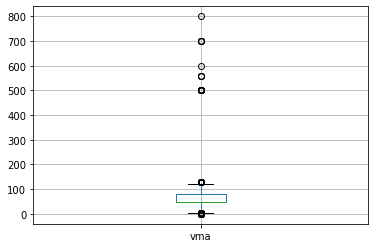

In [31]:
victime.boxplot(column=['vma'])

In [32]:
upper = 130
lower = 10
victime.vma = victime['vma'].clip(lower, upper)

victime.vma.max()

130.0

<AxesSubplot:>

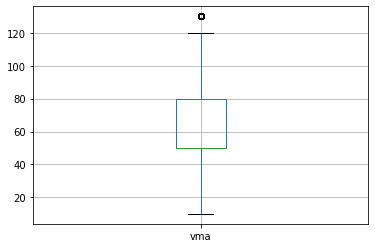

In [33]:
victime.boxplot(column=['vma'])

<AxesSubplot:>

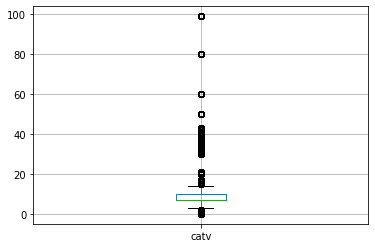

In [34]:
victime.boxplot(column=['catv'])

**Observations**

Notre jeu de données a désormais la forme suivante.

In [35]:
victime.shape

(129098, 40)

**Corrélations / Fléau de la dimension**

Recherchons les fortes corrélations entre colonnes (qui sont à éviter). 
Nous fixons à 90% le seuil à partir duquel nous considérons que la corrélation entre 2 colonnes est tellement élevée qu'il convient de supprimer l'une des 2 colonnes.
En l'occurrence, ce seuil n'est atteint pour aucune paire de colonnes, aussi nous n'identifions pas de colonnes redondantes.

<AxesSubplot:>

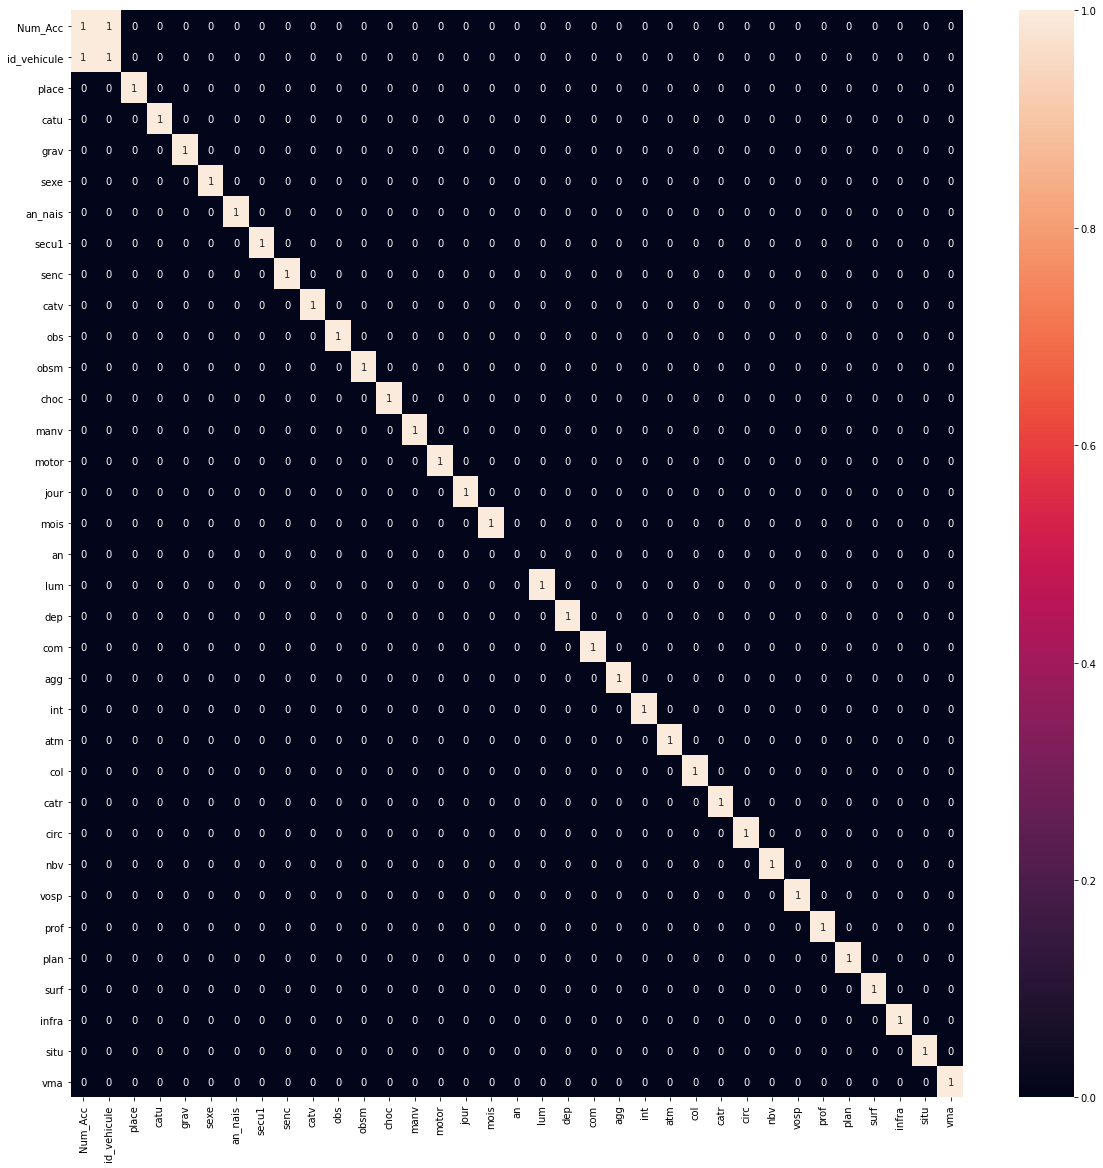

In [36]:
plt.figure(figsize=(20, 20))
sns.heatmap(np.abs(victime.corr())>0.9, annot=True)



matrice de cramer



Par ailleurs, nous observons une variance nulle de la série de données 'an'. Une vérification permet de constater qu'il s'agit de l'année de survenance de l'accident et qu'effectivement toutes les données ont été recueillies la même année (2019). 
Nous décidons de supprimer cette colonne dans la mesure où les données ne varient pas.

In [37]:
victime.var().sort_values()

an             0.000000e+00
sexe           2.176286e-01
agg            2.348615e-01
prof           3.131390e-01
vosp           3.294850e-01
circ           3.619370e-01
catu           3.943431e-01
plan           4.440504e-01
surf           6.571246e-01
senc           6.876858e-01
motor          1.099605e+00
obsm           1.186730e+00
situ           1.241440e+00
catr           1.632551e+00
grav           1.882520e+00
nbv            2.098621e+00
lum            2.234127e+00
atm            2.781270e+00
col            3.463398e+00
int            3.905630e+00
infra          4.876633e+00
choc           5.714462e+00
secu1          6.108636e+00
place          7.184099e+00
obs            1.066227e+01
mois           1.143117e+01
manv           6.582514e+01
jour           7.654311e+01
catv           1.508897e+02
an_nais        3.656911e+02
vma            4.925522e+02
dep            4.127707e+04
Num_Acc        2.882639e+08
com            8.872516e+08
id_vehicule    1.045878e+09
dtype: float64

In [38]:
victime.an.value_counts()

2019    129098
Name: an, dtype: int64

In [39]:
victime.drop('an', axis=1, inplace=True)

Conscients du fléau de la dimension, nous savons que le nombre de lignes doit être exponentiellement proportionnel au nombre de features. Nous vérifions ci-dessous que c'est bien le cas.

In [40]:
victime.shape[0]/victime.shape[1]

3310.2051282051284

Pour finir, notre dataset a la forme suivante : 

In [41]:
victime.shape

(129098, 39)

In [42]:
dq

NameError: name 'dq' is not defined

### Create a Test Set

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(ecl, test_size=0.2, random_state=42)

print(len(train_set))
len(test_set)

**Ensure that the test set is representative of the various categories in the whole dataset**

Suppose you want to ensure that the test set is representative of the various categories of incomes in the whole dataset.
Since the median income is a continuous numerical attribute, you first need to create an income category attribute.
The following code uses the pd.cut() function to create an income category attribute with 5 categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on.

In [ ]:
ecl["income_cat"] = pd.cut(ecl["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

ecl["income_cat"].hist(bins=15)

Now you are ready to do stratified sampling based on the income category. For this you can use Scikit-Learn’s StratifiedShuffleSplit class.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(ecl, ecl["income_cat"]):
    strat_train_set = ecl.loc[train_index]
    strat_test_set = ecl.loc[test_index]

#check
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [ ]:
# as compared to:
ecl["income_cat"].value_counts() / len(ecl)

In [ ]:
# as compared to:
train_set, test_set = train_test_split(ecl, test_size=0.2, random_state=42)
test_set["income_cat"].value_counts() / len(test_set)

As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas thetest set generated using purely random sampling is quite skewed.
Now let's remove the income_cat attribute so the data is back to its original state.

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Discover and Visualize the Data to Gain Insights

In [ ]:
strat_train_set.shape

In [ ]:
strat_test_set.shape

In [ ]:
ecl = strat_train_set.copy()

In [ ]:
ecl.plot(kind="scatter", x="longitude", y="latitude")

In [ ]:
ecl.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [ ]:
ecl.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=ecl["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

### Creating Useful New Attribute Combinations

In [ ]:
ecl["rooms_per_household"] = ecl["total_rooms"]/ecl["households"]
ecl["bedrooms_per_room"] = ecl["total_bedrooms"]/ecl["total_rooms"]
ecl["population_per_household"] = ecl["population"]/ecl["households"]

ecl.corr()["median_house_value"].sort_values(ascending=False)

Hey, not bad! Our new attributes are much more correlated with our target attribute than the old ones.

### Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes.

In the example below the transformer has one hyperparameter, add_bedrooms_per_room, set to True by default. 
More generally, you should add a hyperparameter to gate any data preparation step that you are not 100% sure about. 
The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
             return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
ecl_extra_attribs = attr_adder.transform(ecl.values)

### Feature Scaling

With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the ecl data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15.

Note that scaling the target values is generally NOT required. 

There are two common ways to get all attributes to have the same scale: min-max scaling/normalization and standardization.
Normalization is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. Scikit-Learn provides a
transformer called MinMaxScaler for this.
Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance.


### Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy="median")),
     ('attribs_adder', CombinedAttributesAdder()),
     ('std_scaler', StandardScaler())
     ])
ecl_num_tr = num_pipeline.fit_transform(ecl_num)

The Pipeline constructor defines a sequence of steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method).
When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the fit() method.

In [ ]:
pd.DataFrame(ecl_num_tr)

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(ecl_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
ecl_prepared = full_pipeline.fit_transform(ecl)

In [ ]:
ecl_prepared.shape

Returns arrays

### Select and Train a Model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(ecl_prepared, ecl_labels)

In [ ]:
some_data = ecl.iloc[:5]
some_labels = ecl_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

In [ ]:
from sklearn.metrics import mean_squared_error
ecl_predictions = lin_reg.predict(ecl_prepared)
lin_mse = mean_squared_error(ecl_labels, ecl_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

Okay, this is better than nothing but clearly not a great score: most districts’ median_ecl_values range between $120,000 and $265,000, so a typical prediction error of $68,628 is not very satisfying. This is an example of a model underfitting the training data.
When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. 
As we saw in the previous chapter, the main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. This model is not regularized, so this rules out the last option. You could try to add more features (e.g., the log of the population), but first let’s try a more complex model to see how it does.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(ecl_prepared, ecl_labels)

ecl_predictions = tree_reg.predict(ecl_prepared)
tree_mse = mean_squared_error(ecl_labels, ecl_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

Wait, what!? No error at all? Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for train‐
ing, and part for model validation.


### Better Evaluation Using Cross-Validation

The following code randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, ecl_prepared, ecl_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, ecl_prepared, ecl_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

That’s right: the Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.

In [ ]:
ecl_prepared.shape


In [ ]:
ecl_labels.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_jobs=-1)
forest_reg.fit(ecl_prepared, ecl_labels)
eclpred = forest_reg.predict(ecl_prepared)
forest_mse = mean_squared_error(ecl_labels, eclpred)
forest_rmse = np.sqrt(forest_mse)

In [ ]:
forest_scores = cross_val_score(forest_reg, ecl_prepared, ecl_labels,scoring="neg_mean_squared_error", cv=10, verbose=10, n_jobs=-1)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Wow, this is much better: Random Forests look very promising. However, note that
the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set

In [ ]:
import joblib
joblib.dump(forest_reg, "my_model.pkl")
#
#my_model_loaded = joblib.load("my_model.pkl")

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [ {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
               {'bootstrap': [False],'n_estimators': [3, 10], 'max_features': [2, 3, 4]} ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(ecl_prepared, ecl_labels)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_params_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

### Evaluate Your System on the Test Set

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))
